<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
import pandas as pd
import numpy as np

import itertools

In [120]:
df = pd.DataFrame({
    'pattern': ['a', 'a', 'a', 'b', 'b', 'b'],
    'tcr':['c', 'd', 'e', 'f', 'g', 'h'],
    'sample':['pb', 'pb', 'csf', 'csf', 'pb', 'tumor'],
    'freq':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
})

In [121]:
df

,pattern,tcr,sample,freq
0,a,c,pb,0.1
1,a,d,pb,0.2
2,a,e,csf,0.3
3,b,f,csf,0.4
4,b,g,pb,0.5
5,b,h,tumor,0.6


In [122]:
[tuple(x) for x in df[['sample', 'freq']].values]

[('pb', 0.1),
 ('pb', 0.2),
 ('csf', 0.3),
 ('csf', 0.4),
 ('pb', 0.5),
 ('tumor', 0.6)]

In [123]:
grouped = df.groupby('pattern')

resultlist = []

for key,group in grouped:
    for b,g in itertools.permutations([tuple(x) for x in group[['sample','tcr', 'freq']].values],2):
        resultlist.append([key,*b,g[0]])

result = pd.DataFrame(resultlist,columns=['pattern','sample', 'tcr','freq', 'to' ])

In [124]:
result

,pattern,sample,tcr,freq,to
0,a,pb,c,0.1,pb
1,a,pb,c,0.1,csf
2,a,pb,d,0.2,pb
3,a,pb,d,0.2,csf
4,a,csf,e,0.3,pb
5,a,csf,e,0.3,pb
6,b,csf,f,0.4,pb
7,b,csf,f,0.4,tumor
8,b,pb,g,0.5,csf
9,b,pb,g,0.5,tumor


In [125]:
connection = result.groupby(['sample','tcr', 'to']).size().to_frame()
connection.columns = ['connected']
connection = connection.reset_index()
connection['connected'] = connection['connected'] > 1

In [126]:
connection

,sample,tcr,to,connected
0,csf,e,pb,True
1,csf,f,pb,False
2,csf,f,tumor,False
3,pb,c,csf,False
4,pb,c,pb,False
5,pb,d,csf,False
6,pb,d,pb,False
7,pb,g,csf,False
8,pb,g,tumor,False
9,tumor,h,csf,False


In [130]:
df_connect = pd.pivot_table(connection, index=['sample', 'tcr'], 
                            values='connected', columns=['to'], aggfunc=np.any)

In [131]:
df_connect = df_connect.reset_index()

In [135]:
df_connect

to,sample,tcr,csf,pb,tumor
0,csf,e,NaN,True,NaN
1,csf,f,NaN,False,False
2,pb,c,False,False,NaN
3,pb,d,False,False,NaN
4,pb,g,False,NaN,False
5,tumor,h,False,False,NaN


In [136]:
df_in = pd.DataFrame({
    'tcr':['c', 'd', 'e', 'f', 'g', 'h', 'i'],
    'sample':['pb', 'pb', 'csf', 'csf', 'pb', 'tumor', 'tumor'],
    'freq':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
})

In [137]:
df_in

,tcr,sample,freq
0,c,pb,0.1
1,d,pb,0.2
2,e,csf,0.3
3,f,csf,0.4
4,g,pb,0.5
5,h,tumor,0.6
6,i,tumor,0.7


In [138]:
df_in.merge(df_connect, how='left', on=['sample', 'tcr'])

,tcr,sample,freq,csf,pb,tumor
0,c,pb,0.1,False,False,NaN
1,d,pb,0.2,False,False,NaN
2,e,csf,0.3,NaN,True,NaN
3,f,csf,0.4,NaN,False,False
4,g,pb,0.5,False,NaN,False
5,h,tumor,0.6,False,False,NaN
6,i,tumor,0.7,NaN,NaN,NaN


In [1]:
import sys
sys.path.append('../../connectTCR')
from connectTCR.gliph import *
from connectTCR.mapping import *

In [37]:
df_in = read_gliph_input("../data/gliph/blood-csf-tumor", "blood-csf-tumor_general")

/Users/racng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [38]:
df_in.head()

,TcRb,V,J,TcRa,Sample,Freq
0,CAGSIGASGYNEQFF,TRBV2,TRBJ2-1,CILRFYNQGGKLIF,PBT103-1,0.001083
1,CAIPREGLYNEQFF,TRBV5-8,TRBJ2-1,,PBT103-1,0.001083
2,CAIRAGIMNTEAFF,TRBV10-3,TRBJ1-1,,PBT103-1,0.001083
3,CAISDLGQGAEAFF,TRBV10-3,TRBJ1-1,CAGDTGNQFYF,PBT103-1,0.001083
4,CAISGVFRDRVTQETQYF,TRBV10-3,TRBJ2-5,CAASKAISGSNFGNEKLTF,PBT103-1,0.001083


In [39]:
df_out = read_gliph_output("../data/gliph/blood-csf-tumor/gliph_output_blood-csf-tumor_general.csv")

In [40]:
df_out.head()

,index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,...,HLA-C,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DRB1,HLA-DRB3,HLA-DRB4,HLA-DRB5,pattern-index
0,1,FPNE,3.200000e-31,2,62,2.300000e-07,1.0,0.83,0.049,0.56,...,-,-,-,-,-,-,-,-,-,FPNE-1
1,1,FPNE,3.200000e-31,2,62,2.300000e-07,1.0,0.83,0.049,0.56,...,-,-,-,-,-,-,-,-,-,FPNE-1
2,1,FPNE,3.200000e-31,2,62,2.300000e-07,1.0,0.83,0.049,0.56,...,-,-,-,-,-,-,-,-,-,FPNE-1
3,1,FPNE,3.200000e-31,2,62,2.300000e-07,1.0,0.83,0.049,0.56,...,-,-,-,-,-,-,-,-,-,FPNE-1
4,1,FPNE,3.200000e-31,2,62,2.300000e-07,1.0,0.83,0.049,0.56,...,-,-,-,-,-,-,-,-,-,FPNE-1


In [41]:
df_out.columns

Index(['index', 'pattern', 'Fisher_score', 'number_subject',
       ' number_unique_cdr3', ' final_score', 'hla_score', 'vb_score',
       'expansion_score', 'length_score', 'cluster_size_score', 'type',
       'ulTcRb', 'TcRb', 'V', 'J', 'TcRa', 'Sample', 'Freq', 'HLA-A', 'HLA-B',
       'HLA-C', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1',
       'HLA-DRB3', 'HLA-DRB4', 'HLA-DRB5', 'pattern-index'],
      dtype='object')

In [42]:
df_out_no_single = df_out.loc[(df_out['pattern']!='single')]

In [43]:
map_gliph(df_in, df_out_no_single
          , 'index', 'Sample')

../../connectTCR/connectTCR/mapping.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_out['has'+comp] = comp # string place holder for mapping
../../connectTCR/connectTCR/mapping.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_out['has'+comp] = df_out.set_index([groupby, 'has'+comp]).index.map(sample_in_gliph)
../../connectTCR/connectTCR/mapping.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [54]:
tsdir = '../output/timeseries/'
df_pb = pd.read_csv(tsdir+'pb.meta.v2.csv')
df_pb['sample'] = 'PB' 
df_csf = pd.read_csv(tsdir+'csf.meta.v3.csv')
df_csf['sample'] = 'CSF' 

df_csf['kshape'] = df_csf['kshape'].astype(str).str.replace('0', 'N')
df_pb['kshape']  = df_pb['kshape'].astype(str).str.replace('0', 'N')
df_csf['sample:kshape'] = df_csf['sample'] + ':' + df_csf['kshape'].astype(str)
df_pb['sample:kshape'] = df_pb['sample'] + ':' + df_pb['kshape'].astype(str)

df_tumor = pd.read_csv("../../paper_upn109/data/tcr/Tumor_scTCRB.csv")
df_tumor['sample'] = df_tumor['Treatment']
df_tumor['sample:kshape'] = df_tumor['sample']
meta = pd.concat([dfi[['TRB', 'sample', 'sample:kshape']] for dfi in [df_csf, df_pb, df_tumor]])


In [55]:
meta.head()

,TRB,sample,sample:kshape
0,CASSWTGGSYEQYF,CSF,CSF:1
1,CASSYSHLETQYF,CSF,CSF:1
2,CSVFLAGASGANVLTF,CSF,CSF:1
3,CASSSGQGAEGAFF,CSF,CSF:1
4,CATAVWAADNEQFF,CSF,CSF:1


In [46]:
names = {'blood':'PB', 'csf':'CSF', 'PBT103-1':'Pre', 'PBT120':'Post'}
df_in['Sample'] = df_in['Sample'].map(names)

In [56]:
merged = df_in.merge(meta, left_on=['TcRb', 'Sample'], right_on=['TRB', 'sample'], how='inner')

In [57]:
merged['Connected'] = merged[['blood', 'csf', 'PBT103-1', 'PBT120']].any(axis=1)

In [58]:
merged

,TcRb,V,J,TcRa,Sample,Freq,blood,csf,PBT103-1,PBT120,TRB,sample,sample:kshape,Connected
0,CAGSIGASGYNEQFF,TRBV2,TRBJ2-1,CILRFYNQGGKLIF,Pre,0.001083,True,False,False,False,CAGSIGASGYNEQFF,Pre,Pre,True
1,CAIPREGLYNEQFF,TRBV5-8,TRBJ2-1,,Pre,0.001083,True,False,False,False,CAIPREGLYNEQFF,Pre,Pre,True
2,CAIRAGIMNTEAFF,TRBV10-3,TRBJ1-1,,Pre,0.001083,True,True,False,False,CAIRAGIMNTEAFF,Pre,Pre,True
3,CAISDLGQGAEAFF,TRBV10-3,TRBJ1-1,CAGDTGNQFYF,Pre,0.001083,True,False,False,False,CAISDLGQGAEAFF,Pre,Pre,True
4,CAISGVFRDRVTQETQYF,TRBV10-3,TRBJ2-5,CAASKAISGSNFGNEKLTF,Pre,0.001083,False,False,False,False,CAISGVFRDRVTQETQYF,Pre,Pre,False
5,CAPAGTATYEQYF,TRBV9,TRBJ2-7,CAVRDSAGGSYIPTF,Pre,0.001083,True,True,False,False,CAPAGTATYEQYF,Pre,Pre,True
6,CASAGRQSVANEQFF,TRBV7-9,TRBJ2-1,CTLHGGYQKVTF,Pre,0.001083,False,False,False,False,CASAGRQSVANEQFF,Pre,Pre,False
7,CASANRENQPQHF,TRBV6-6,TRBJ1-5,CAMSIFTAYSGAGSYQLTF,Pre,0.002167,True,False,False,False,CASANRENQPQHF,Pre,Pre,True
8,CASANRENQPQHF,TRBV6-6,TRBJ1-5,CAMSIFTAYSGAGSYQLTF,Pre,0.002167,True,False,False,False,CASANRENQPQHF,Pre,Pre,True
9,CASFPSGGHGNTIYF,TRBV6-5,TRBJ1-3,CIVRADNAGNMLTF,Pre,0.001083,False,False,False,False,CASFPSGGHGNTIYF,Pre,Pre,False


In [62]:
connection = merged.groupby(['sample:kshape', 'Connected'])['Freq'].sum().unstack()
# row normalize
connection = connection.div(connection.sum(axis=1), axis=0)

In [80]:
connection.columns = connection.columns.astype(str)

In [82]:
connection[['True', 'False']]

Connected,True,False
sample:kshape,,
CSF:1,0.711735,0.288265
CSF:2,0.602533,0.397467
CSF:3,0.768321,0.231679
CSF:4,0.781294,0.218706
CSF:N,0.656765,0.343235
PB:1,0.919398,0.080602
PB:2,0.780860,0.219140
PB:3,0.507272,0.492728
PB:4,1.000000,NaN


In [71]:
import seaborn as sns
from matplotlib import rcParams

sns.set_context("paper")
rcParams['figure.dpi'] = 300
rcParams['savefig.transparent'] = True
rcParams['savefig.dpi'] = 300


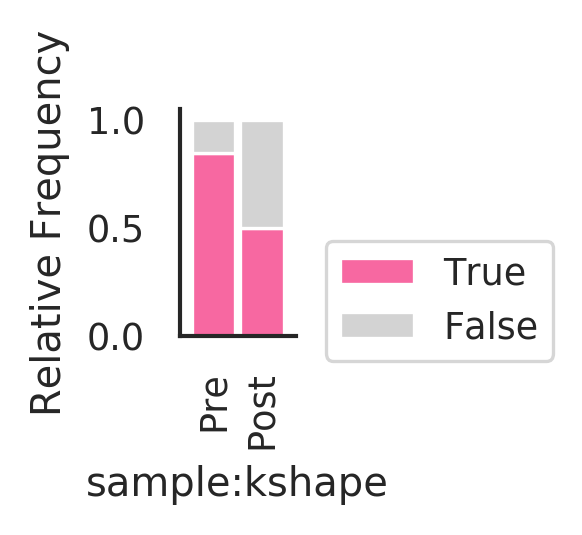

In [85]:
props = connection.loc[['Pre', 'Post'], ['True', 'False']]
with sns.axes_style('white'):
    ax = props.plot(kind='bar', stacked='True', color=['#F768A1','lightgray'], ax=None, figsize=(0.5,1), width=0.9)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.1,0.5))
    ax.set_ylabel('Relative Frequency')
    ax.tick_params(axis='x', which='major', labelrotation=90)
    fig = ax.get_figure()
    fig.savefig('relative_frequency_stacked_tumor.png', \
        bbox_inches='tight', transparent=True)

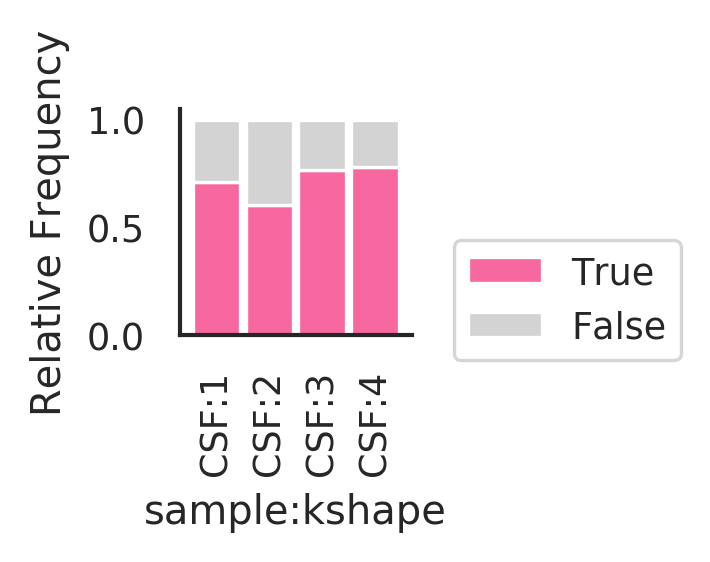

In [87]:
props = connection.loc[['CSF:'+str(i+1) for i in range(4)], ['True', 'False']]
with sns.axes_style('white'):
    ax = props.plot(kind='bar', stacked='True', color=['#F768A1','lightgray'], ax=None, figsize=(1,1), width=0.9)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.1,0.5))
    ax.set_ylabel('Relative Frequency')
    ax.tick_params(axis='x', which='major', labelrotation=90)
    fig = ax.get_figure()
    fig.savefig('relative_frequency_stacked_csf.png', \
        bbox_inches='tight', transparent=True)

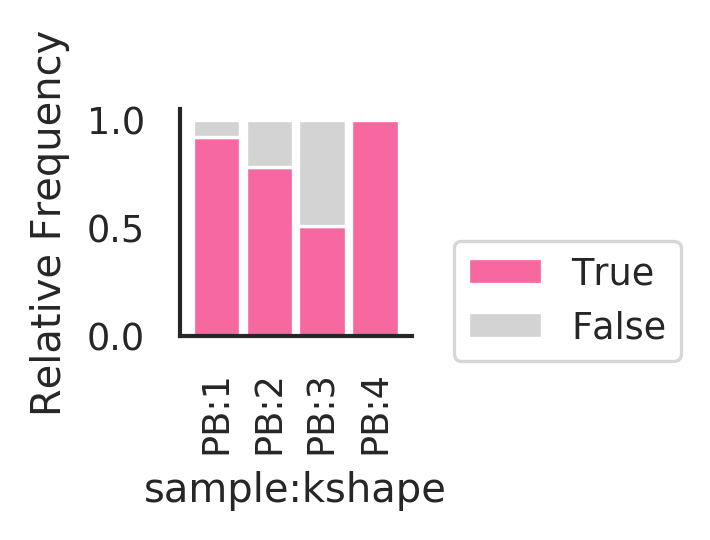

In [88]:
props = connection.loc[['PB:'+str(i+1) for i in range(4)], ['True', 'False']]
with sns.axes_style('white'):
    ax = props.plot(kind='bar', stacked='True', color=['#F768A1','lightgray'], ax=None, figsize=(1,1), width=0.9)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.1,0.5))
    ax.set_ylabel('Relative Frequency')
    ax.tick_params(axis='x', which='major', labelrotation=90)
    fig = ax.get_figure()
    fig.savefig('relative_frequency_stacked_csf.png', \
        bbox_inches='tight', transparent=True)